<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Neural Network Framework (Keras)

## *Data Science Unit 4 Sprint 2 Assignment 3*

## Use the Keras Library to build a Multi-Layer Perceptron Model on the Boston Housing dataset

- The Boston Housing dataset comes with the Keras library so use Keras to import it into your notebook. 
- Normalize the data (all features should have roughly the same scale)
- Import the type of model and layers that you will need from Keras.
- Instantiate a model object and use `model.add()` to add layers to your model
- Since this is a regression model you will have a single output node in the final layer.
- Use activation functions that are appropriate for this task
- Compile your model
- Fit your model and report its accuracy in terms of Mean Squared Error
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Run this same data through a linear regression model. Which achieves higher accuracy?
- Do a little bit of feature engineering and see how that affects your neural network model. (you will need to change your model to accept more inputs)
- After feature engineering, which model sees a greater accuracy boost due to the new features?

In [1]:
##### Your Code Here #####

### Import the data

from tensorflow.keras.datasets import boston_housing

(X_train, y_train), (X_test, y_test) = boston_housing.load_data(
    path="boston_housing.npz", test_split=0.2, seed=113
)

57344/57026 [==============================] - 0s 0us/step


In [0]:
### Normalize the data

from sklearn.preprocessing import MinMaxScaler

mm_scaler = MinMaxScaler()

X_train_mm = mm_scaler.fit_transform(X_train)
X_test_mm = mm_scaler.transform(X_test)

In [49]:
import pandas as pd

cols = ["crim",
        "zn",
        "indus",
        "chas",
        "nox",
        "rm",
        "age",
        "dis",
        "rad",
        "tax",
        "ptratio",
        "bk",
        "lstat"]

target = "medv"

X_train_df = pd.DataFrame(X_train_mm, columns=cols)
X_test_df = pd.DataFrame(X_test_mm, columns=cols)
y_train_df = pd.DataFrame(y_train, columns=[target])
y_test_df = pd.DataFrame(y_test, columns=[target])

print("X_train shape:", X_train_df.shape)
print("X_test shape:", X_test_df.shape)
print("y_train shape:", y_train_df.shape)
print("y_test shape:", y_test_df.shape)

X_train shape: (404, 13)
X_test shape: (102, 13)
y_train shape: (404, 1)
y_test shape: (102, 1)


In [47]:
X_train_df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,bk,lstat
0,0.013782,0.000,0.281525,0.0,0.314815,0.499806,0.914521,0.297191,0.130435,0.227533,0.893617,1.000000,0.468819
1,0.000174,0.825,0.057551,0.0,0.061728,0.784082,0.131823,0.536537,0.043478,0.305927,0.223404,0.996167,0.038079
2,0.054984,0.000,0.646628,0.0,0.506173,0.272851,1.000000,0.021178,1.000000,0.913958,0.808511,0.946089,0.042219
3,0.000374,0.000,0.173387,0.0,0.267490,0.479473,0.325438,0.506821,0.173913,0.068834,0.808511,1.000000,0.173289
4,0.041439,0.000,0.646628,0.0,0.674897,0.545120,0.880536,0.150041,1.000000,0.913958,0.808511,0.986207,0.356512


In [50]:
y_train_df.head()

,medv
0,15.2
1,42.3
2,50.0
3,21.1
4,17.7


In [0]:
X_train_df = X_train_df.drop('bk', axis=1)
X_test_df = X_test_df.drop('bk', axis=1)

In [0]:
### Import the model and layers

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [0]:
### Instantiate model object and add layers

model = Sequential()

model.add(Dense(128, input_dim=(12), activation='relu'))
model.add(Dense(64, activation='swish'))
model.add(Dense(1, activation='linear'))

In [0]:
### Compile the model

mse = tf.keras.losses.MeanSquaredError()

model.compile(
    loss = mse, 
    optimizer='adam', 
    metrics=[tf.keras.metrics.MeanSquaredError()]
)

In [78]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 128)               1664      
_________________________________________________________________
dense_34 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_35 (Dense)             (None, 1)                 65        
Total params: 9,985
Trainable params: 9,985
Non-trainable params: 0
_________________________________________________________________


In [79]:
### Fit the model and report accuracy in terms of Mean Squared Error

from tensorflow.keras.callbacks import EarlyStopping

stop = EarlyStopping(monitor='val_mean_squared_error', 
                     min_delta=0.01, 
                     patience=3)

hist = model.fit(
    X_train_df, 
    y_train_df, 
    epochs=1000, 
    validation_data=(X_test_df, y_test_df),
    callbacks=[stop],
    verbose=1
)

Epoch 1/1000
13/13 [==============================] - 0s 16ms/step - loss: 571.5367 - mean_squared_error: 571.5367 - val_loss: 576.6498 - val_mean_squared_error: 576.6498
Epoch 2/1000
13/13 [==============================] - 0s 9ms/step - loss: 521.9622 - mean_squared_error: 521.9622 - val_loss: 506.5107 - val_mean_squared_error: 506.5107
Epoch 3/1000
13/13 [==============================] - 0s 10ms/step - loss: 429.0977 - mean_squared_error: 429.0977 - val_loss: 378.1229 - val_mean_squared_error: 378.1229
Epoch 4/1000
13/13 [==============================] - 0s 9ms/step - loss: 289.9791 - mean_squared_error: 289.9791 - val_loss: 220.5535 - val_mean_squared_error: 220.5535
Epoch 5/1000
13/13 [==============================] - 0s 9ms/step - loss: 172.2865 - mean_squared_error: 172.2865 - val_loss: 163.7862 - val_mean_squared_error: 163.7862
Epoch 6/1000
13/13 [==============================] - 0s 9ms/step - loss: 147.3262 - mean_squared_error: 147.3262 - val_loss: 138.9483 - val_mean_sq

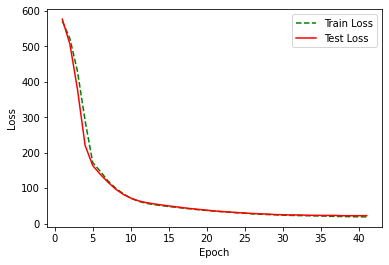

In [80]:
### Make graphs of the model's loss or train/validation accuracies by epoch
import matplotlib.pyplot as plt

train_loss = hist.history['loss']
test_loss = hist.history['val_loss']

epoch_count = range(1, len(train_loss) + 1)

plt.plot(epoch_count, train_loss, 'g--')
plt.plot(epoch_count, test_loss, 'r-')
plt.legend(['Train Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.show();

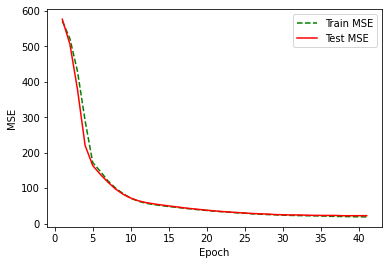

In [81]:
train_mse = hist.history['mean_squared_error']
test_mse = hist.history['val_mean_squared_error']

epoch_count = range(1, len(train_loss) + 1)

plt.plot(epoch_count, train_mse, 'g--')
plt.plot(epoch_count, test_mse, 'r-')
plt.legend(['Train MSE', 'Test MSE'])
plt.xlabel('Epoch')
plt.ylabel('MSE')

plt.show();

In [83]:
### Run this same data through a linear regression model - which achieves 
### lower mean squared error?

from sklearn.linear_model import LinearRegression
from sklearn import metrics

regressor = LinearRegression()  
regressor.fit(X_train_df, y_train_df)

y_pred = regressor.predict(X_test_df)

print("Mean Squared Error (test):", metrics.mean_squared_error(y_test_df,
                                                               y_pred))


### Keras achieved lower mean squared error, but only slightly by
### about 1 point

Mean Squared Error (test): 23.927224586760023


## Use the Keras Library to build an image recognition network using the Fashion-MNIST dataset (also comes with keras)

- Load and preprocess the image data similar to how we preprocessed the MNIST data in class.
- Make sure to one-hot encode your category labels
- The number of nodes in your output layer should equal the number of classes you want to predict for Fashion-MNIST.
- Try different hyperparameters. What is the highest accuracy that you are able to achieve.
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Remember that neural networks fall prey to randomness so you may need to run your model multiple times (or use Cross Validation) in order to tell if a change to a hyperparameter is truly producing better results.

In [84]:
##### Your Code Here #####

### Load data

from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [87]:
y_train

### Labels already appear encoded:

# 0	T-shirt/top
# 1	Trouser
# 2	Pullover
# 3	Dress
# 4	Coat
# 5	Sandal
# 6	Shirt
# 7	Sneaker
# 8	Bag
# 9	Ankle boot

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [0]:
### Preprocessing

X_train = X_train / 255.0

X_test = X_test / 255.0

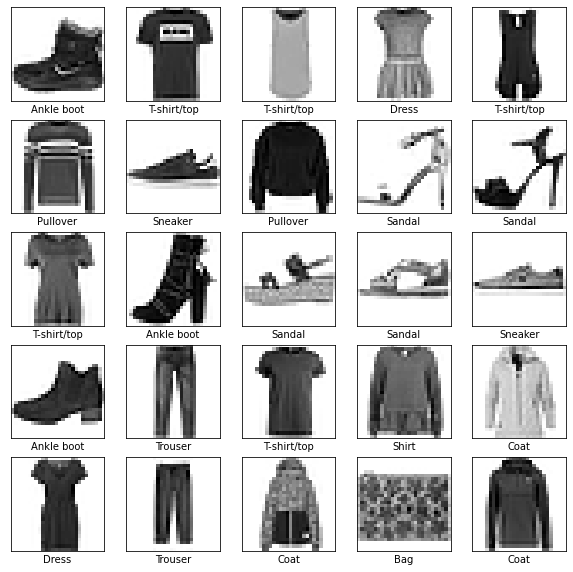

In [89]:
### Sanity Check

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [0]:
from tensorflow.keras.layers import Flatten

### Baseline Model

In [95]:
%load_ext tensorboard

import os
import tensorflow as tf

# logdir = os.path.join("logs", "First")
# tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

model = Sequential([
    Flatten(),
    Dense(128, input_dim=784, activation='sigmoid'),
    Dense(10, activation='softmax'),
])

model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

stop = EarlyStopping(monitor='val_accuracy', 
                     min_delta=0.01, 
                     patience=3)

hist_baseline = model.fit(x=X_train, 
                 y=y_train, 
                 epochs=20, 
                 validation_data=(X_test, y_test))

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard
Epoch 1/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5409 - accuracy: 0.8160 - val_loss: 0.4432 - val_accuracy: 0.8418
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3908 - accuracy: 0.8605 - val_loss: 0.4016 - val_accuracy: 0.8594
Epoch 3/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3546 - accuracy: 0.8722 - val_loss: 0.4049 - val_accuracy: 0.8542
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3302 - accuracy: 0.8803 - val_loss: 0.3853 - val_accuracy: 0.8623
Epoch 5/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3123 - accuracy: 0.8869 - val_loss: 0.3531 - val_accuracy: 0.8729
Epoch 6/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2964 - accuracy: 0.8920 - val_loss: 0.3502 - val_accuracy: 0.8767
Epoch 7/20
1875/1875 [========================

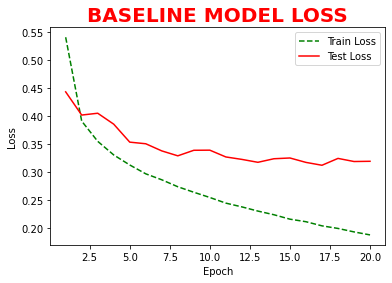

In [103]:
### Make graphs of the model's loss or train/validation accuracies by epoch
import matplotlib.pyplot as plt

train_loss = hist_baseline.history['loss']
test_loss = hist_baseline.history['val_loss']

epoch_count = range(1, len(train_loss) + 1)

plt.plot(epoch_count, train_loss, 'g--')
plt.plot(epoch_count, test_loss, 'r-')
plt.legend(['Train Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('BASELINE MODEL LOSS', fontsize=20, fontweight='bold', color='red')

plt.show();

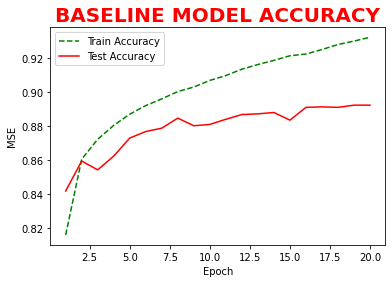

In [108]:
train_acc = hist_baseline.history['accuracy']
test_acc = hist_baseline.history['val_accuracy']

epoch_count = range(1, len(train_loss) + 1)

plt.plot(epoch_count, train_acc, 'g--')
plt.plot(epoch_count, test_acc, 'r-')
plt.legend(['Train Accuracy', 'Test Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title('BASELINE MODEL ACCURACY', fontsize=20, fontweight='bold', color='red')


plt.show();

### Additional Layer

In [107]:
model = Sequential([
    Flatten(),
    Dense(128, input_dim=784, activation='sigmoid'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

hist_II = model.fit(x=X_train, 
                 y=y_train, 
                 epochs=20, 
                 validation_data=(X_test, y_test))

Epoch 1/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5194 - accuracy: 0.8152 - val_loss: 0.4461 - val_accuracy: 0.8381
Epoch 2/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3794 - accuracy: 0.8615 - val_loss: 0.3972 - val_accuracy: 0.8574
Epoch 3/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3452 - accuracy: 0.8740 - val_loss: 0.4114 - val_accuracy: 0.8472
Epoch 4/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3218 - accuracy: 0.8813 - val_loss: 0.3775 - val_accuracy: 0.8611
Epoch 5/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3022 - accuracy: 0.8873 - val_loss: 0.3470 - val_accuracy: 0.8757
Epoch 6/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2858 - accuracy: 0.8935 - val_loss: 0.3387 - val_accuracy: 0.8773
Epoch 7/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2729 - accuracy: 0.8985 - val_loss: 0.3411 - val_accuracy:

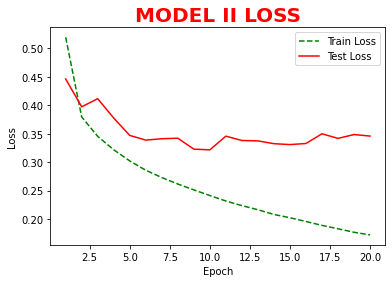

In [109]:
train_loss = hist_II.history['loss']
test_loss = hist_II.history['val_loss']

epoch_count = range(1, len(train_loss) + 1)

plt.plot(epoch_count, train_loss, 'g--')
plt.plot(epoch_count, test_loss, 'r-')
plt.legend(['Train Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('MODEL II LOSS', fontsize=20, fontweight='bold', color='red')

plt.show();

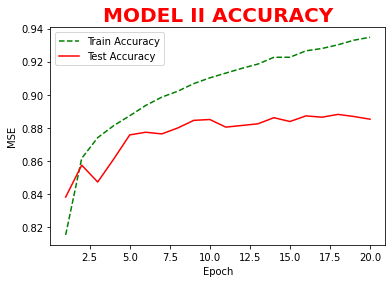

In [110]:
train_acc = hist_II.history['accuracy']
test_acc = hist_II.history['val_accuracy']

epoch_count = range(1, len(train_loss) + 1)

plt.plot(epoch_count, train_acc, 'g--')
plt.plot(epoch_count, test_acc, 'r-')
plt.legend(['Train Accuracy', 'Test Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title('MODEL II ACCURACY', fontsize=20, fontweight='bold', color='red')


plt.show();

### Two Added Layers

In [112]:
model = Sequential([
    Flatten(),
    Dense(128, input_dim=784, activation='sigmoid'),
    Dense(64, activation='relu'),
    Dense(32, activation='swish'),
    Dense(10, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

hist_III = model.fit(x=X_train, 
                 y=y_train, 
                 epochs=20, 
                 validation_data=(X_test, y_test))

Epoch 1/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5258 - accuracy: 0.8103 - val_loss: 0.4168 - val_accuracy: 0.8478
Epoch 2/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3823 - accuracy: 0.8597 - val_loss: 0.4063 - val_accuracy: 0.8508
Epoch 3/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3469 - accuracy: 0.8717 - val_loss: 0.3922 - val_accuracy: 0.8580
Epoch 4/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3219 - accuracy: 0.8800 - val_loss: 0.3727 - val_accuracy: 0.8646
Epoch 5/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3033 - accuracy: 0.8876 - val_loss: 0.3471 - val_accuracy: 0.8752
Epoch 6/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2867 - accuracy: 0.8923 - val_loss: 0.3536 - val_accuracy: 0.8729
Epoch 7/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2735 - accuracy: 0.8981 - val_loss: 0.3273 - val_accuracy:

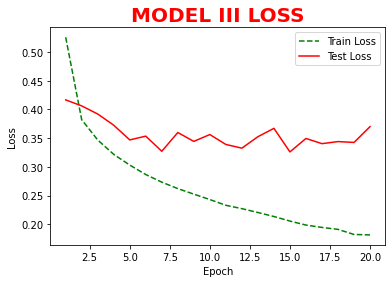

In [114]:
train_loss = hist_III.history['loss']
test_loss = hist_III.history['val_loss']

epoch_count = range(1, len(train_loss) + 1)

plt.plot(epoch_count, train_loss, 'g--')
plt.plot(epoch_count, test_loss, 'r-')
plt.legend(['Train Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('MODEL III LOSS', fontsize=20, fontweight='bold', color='red')

plt.show();

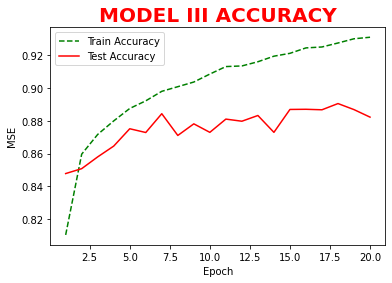

In [115]:
train_acc = hist_III.history['accuracy']
test_acc = hist_III.history['val_accuracy']

epoch_count = range(1, len(train_loss) + 1)

plt.plot(epoch_count, train_acc, 'g--')
plt.plot(epoch_count, test_acc, 'r-')
plt.legend(['Train Accuracy', 'Test Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title('MODEL III ACCURACY', fontsize=20, fontweight='bold', color='red')


plt.show();

### Different Optimizer With Early Stop

In [113]:
model = Sequential([
    Flatten(),
    Dense(128, input_dim=784, activation='sigmoid'),
    Dense(64, activation='swish'),
    Dense(32, activation='swish'),
    Dense(10, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='adadelta', 
              metrics=['accuracy'])

stop = EarlyStopping(
    monitor='val_accuracy', 
    min_delta=0.01, 
    patience=3
)

hist_IV = model.fit(x=X_train, 
                     y=y_train, 
                     epochs=1000, 
                     validation_data=(X_test, y_test), 
                     callbacks=[stop])

Epoch 1/1000
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3052 - accuracy: 0.1000 - val_loss: 2.2783 - val_accuracy: 0.1000
Epoch 2/1000
1875/1875 [==============================] - 7s 4ms/step - loss: 2.2529 - accuracy: 0.1005 - val_loss: 2.2276 - val_accuracy: 0.1037
Epoch 3/1000
1875/1875 [==============================] - 7s 4ms/step - loss: 2.2000 - accuracy: 0.1418 - val_loss: 2.1721 - val_accuracy: 0.1793
Epoch 4/1000
1875/1875 [==============================] - 8s 4ms/step - loss: 2.1404 - accuracy: 0.2078 - val_loss: 2.1086 - val_accuracy: 0.2341
Epoch 5/1000
1875/1875 [==============================] - 7s 4ms/step - loss: 2.0718 - accuracy: 0.2701 - val_loss: 2.0359 - val_accuracy: 0.3036
Epoch 6/1000
1875/1875 [==============================] - 8s 4ms/step - loss: 1.9942 - accuracy: 0.3230 - val_loss: 1.9548 - val_accuracy: 0.3370
Epoch 7/1000
1875/1875 [==============================] - 8s 4ms/step - loss: 1.9102 - accuracy: 0.3469 - val_loss: 1.8694 -

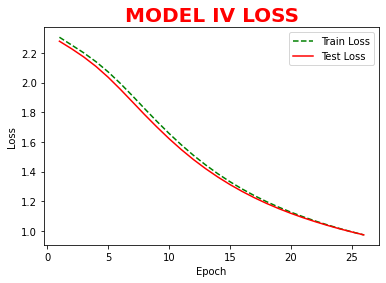

In [116]:
train_loss = hist_IV.history['loss']
test_loss = hist_IV.history['val_loss']

epoch_count = range(1, len(train_loss) + 1)

plt.plot(epoch_count, train_loss, 'g--')
plt.plot(epoch_count, test_loss, 'r-')
plt.legend(['Train Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('MODEL IV LOSS', fontsize=20, fontweight='bold', color='red')

plt.show();

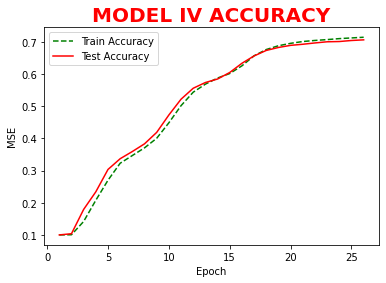

In [117]:
train_acc = hist_IV.history['accuracy']
test_acc = hist_IV.history['val_accuracy']

epoch_count = range(1, len(train_loss) + 1)

plt.plot(epoch_count, train_acc, 'g--')
plt.plot(epoch_count, test_acc, 'r-')
plt.legend(['Train Accuracy', 'Test Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title('MODEL IV ACCURACY', fontsize=20, fontweight='bold', color='red')


plt.show();

## Stretch Goals:

- Use Hyperparameter Tuning to make the accuracy of your models as high as possible. (error as low as possible)
- Use Cross Validation techniques to get more consistent results with your model.
- Use GridSearchCV to try different combinations of hyperparameters. 
- Start looking into other types of Keras layers for CNNs and RNNs maybe try and build a CNN model for fashion-MNIST to see how the results compare.